Jalal Qureshi
250925204
CS4442 Asn1

Import data

In [490]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import *

# Question 2.a)

# load training data
x_training = np.loadtxt("hw1xtr.dat")
y_training = np.loadtxt("hw1ytr.dat")

print(y_training.shape)

# load test data
x_testing = np.loadtxt("hw1xte.dat")
y_testing = np.loadtxt("hw1yte.dat")

(40,)


Question 2 a)

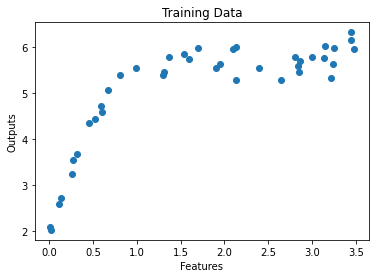

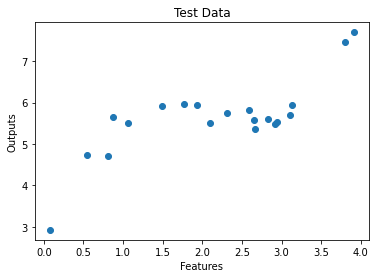

In [491]:
# plot training data
plt.figure(1)
plt.scatter(x_training, y_training)
plt.title("Training Data")
plt.xlabel("Features")
plt.ylabel("Outputs")

# plot training data
plt.figure(2)
plt.scatter(x_testing, y_testing)
plt.title("Test Data")
plt.xlabel("Features")
plt.ylabel("Outputs")

# show the plots
plt.show()

Helper functions

In [492]:
# y is training output
# x is training/test input
def get_weight(x,y):
  x_transpose_dot_x = np.dot(x.T, x)
  inverse_x_transpose_dot_x = np.linalg.pinv(x_transpose_dot_x)
  x_transpose_dot_y = np.dot(x.T, y)
  weight = np.dot(inverse_x_transpose_dot_x,x_transpose_dot_y)
  return weight

# x is training/test data
def get_hypothesis(x,w): 
  hypothesis = np.dot(x,w)
  return hypothesis

def get_error(x,y,w):
  len_target = len(y)
  hypothesis = get_hypothesis(x,w) 
  total_variation=0
  for i in range(len_target):
    actual_val = y[i]
    calculated_val = hypothesis[i]
    total_variation += (actual_val - calculated_val)**2
  error = total_variation/len_target
  return error


def order_poly(x,w, order):
  if order==2:
    return( w[0]*(x)**2 + w[1]*x + w[2])
  if order==3:
    return( w[0]*(x)**3 + w[1]*(x)**2 + w[2]*x + w[3])
  if order==4:
    return( w[0]*(x)**4 + w[1]*(x)**3 + w[2]*(x)**2 + w[3]*x + w[4])



Get the shape of the features arrays and create the respective column vectors of ones

In [493]:
shape_training = x_training.shape
shape_testing = x_testing.shape
ones_training = np.ones(shape_training)
ones_testing = np.ones(shape_testing)

print(ones_training.shape)

(40,)


Add column vector of ones to the features

In [494]:
x_training_ones = np.c_[x_training, ones_training]
x_testing_ones = np.c_[x_testing, ones_testing]

print(x_testing_ones)



[[2.3114047  1.        ]
 [2.6561232  1.        ]
 [1.7697643  1.        ]
 [0.55082798 1.        ]
 [0.81445064 1.        ]
 [0.87971425 1.        ]
 [3.1300948  1.        ]
 [2.831442   1.        ]
 [2.0959708  1.        ]
 [3.9161472  1.        ]
 [1.0678487  1.        ]
 [2.913461   1.        ]
 [1.4881792  1.        ]
 [1.934699   1.        ]
 [3.1029632  1.        ]
 [3.7949112  1.        ]
 [2.6665423  1.        ]
 [2.9375816  1.        ]
 [2.5834993  1.        ]
 [0.07600009 1.        ]]


Obtain 2D weight vector and hypothesis

In [495]:
weight_regression = get_weight(x_training_ones, y_training)
print(weight_regression.shape)
hypothesis_regression_training = get_hypothesis(x_training_ones, weight_regression)



(2,)


Plot the training data

[4.33381848 6.11960243 6.35262758 4.71677665 4.47689756 6.19876856
 5.90153234 5.74174616 5.89250583 4.0599723  6.38155959 5.17474147
 3.95991118 4.16996774 4.70739013 3.73447926 5.9120974  3.91331772
 5.01349654 6.18195128 3.80420846 5.3260459  6.12815325 6.20340555
 4.76084962 4.93937096 6.35813033 3.72030648 4.23188791 4.89016935
 5.55353065 4.11384549 3.82007541 5.86618305 5.34420257 6.00886967
 4.18007025 3.92271913 5.2106451  5.35264298]


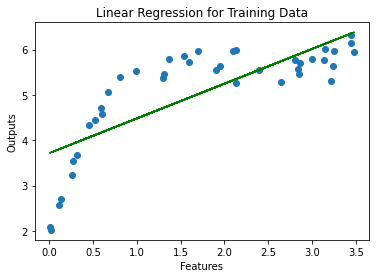

In [496]:
print(hypothesis_regression_training)
plt.figure()
plt.scatter(x_training, y_training)
plt.title("Linear Regression for Training Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.plot(x_training, hypothesis_regression_training, "green")

Calculate average error for training set

In [498]:
error_regression_training = get_error(x_training_ones, y_training, weight_regression)

print(f"Average error for training set is: {error_regression_training}")


Average error for training set is: 0.5085888601660318


Question 2. C)

Plot the test data

(20,)
(20,)


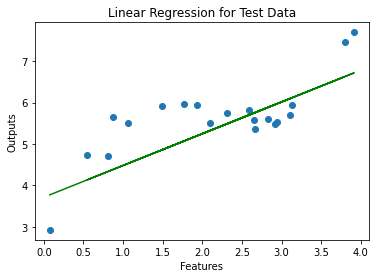

In [499]:
hypothesis_regression_test = get_hypothesis(x_testing_ones, weight_regression)
print(hypothesis_regression_test.shape)
print(x_testing.shape)

plt.figure()
plt.scatter(x_testing, y_testing)
plt.title("Linear Regression for Test Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.plot(x_testing, hypothesis_regression_test, "green")

Calculate Average Error for test set

In [501]:
error_regression_test = get_error(x_testing_ones, y_testing, weight_regression)
print(f"Average error for test set is: {error_regression_test}")

Average error for test set is: 0.44391185790774995


2. d)

Implement the 2nd-order polynomial regression by adding new features x^2 to the inputs.

Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear
regression?


In [502]:
x_training_squared = np.c_[np.square(x_training), x_training_ones]
x_testing_squared = np.c_[np.square(x_testing), x_testing_ones]


print(x_training_ones)

[[0.80880917 1.        ]
 [3.1381904  1.        ]
 [3.442149   1.        ]
 [1.3083408  1.        ]
 [0.9954419  1.        ]
 [3.2414549  1.        ]
 [2.8537392  1.        ]
 [2.6453137  1.        ]
 [2.841965   1.        ]
 [0.4516035  1.        ]
 [3.479888   1.        ]
 [1.9057113  1.        ]
 [0.32108352 1.        ]
 [0.59508185 1.        ]
 [1.296097   1.        ]
 [0.02702954 1.        ]
 [2.8675203  1.        ]
 [0.26030689 1.        ]
 [1.695383   1.        ]
 [3.2195184  1.        ]
 [0.11798449 1.        ]
 [2.1030732  1.        ]
 [3.1493441  1.        ]
 [3.2475034  1.        ]
 [1.3658297  1.        ]
 [1.5986934  1.        ]
 [3.4493268  1.        ]
 [0.00854252 1.        ]
 [0.67585068 1.        ]
 [1.5345147  1.        ]
 [2.3998049  1.        ]
 [0.52187583 1.        ]
 [0.13868138 1.        ]
 [2.8076295  1.        ]
 [2.1267568  1.        ]
 [2.9937503  1.        ]
 [0.60825958 1.        ]
 [0.27257011 1.        ]
 [1.9525441  1.        ]
 [2.1377665  1.        ]]

In [503]:
print(x_training_squared.shape)

(40, 3)


Calculate Weight Vector (params)



In [504]:
squared_weight = get_weight(x_training_squared, y_training)
print(squared_weight)





[-0.55139798  2.69130097  2.77944073]


Plot training and test data

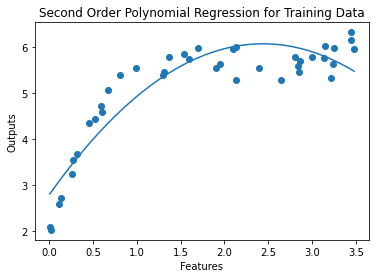

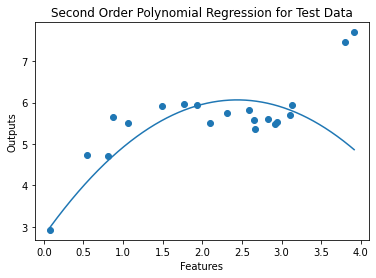

In [505]:
x_interval_training = np.linspace(min(x_training), max(x_training),999)

plt.figure()
plt.title("Second Order Polynomial Regression for Training Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.scatter(x_training, y_training)
plt.plot(x_interval_training, order_poly(x_interval_training, squared_weight,2))


x_interval_testing = np.linspace(min(x_testing), max(x_testing),999)

plt.figure()
plt.title("Second Order Polynomial Regression for Test Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.scatter(x_testing, y_testing)
plt.plot(x_interval_testing, order_poly(x_interval_testing, squared_weight,2))

Calculate Average Error 

In [506]:
error_squared_training = get_error(x_training_squared, y_training, squared_weight)
error_squared_testing = get_error(x_testing_squared, y_testing, squared_weight)

print(f"Average error for training set is: {error_squared_training}")
print(f"Average error for testing set is: {error_squared_testing}")

Average error for training set is: 0.20098523198396653
Average error for testing set is: 0.8532633206012162


2. e)
Implement the 3rd-order polynomial regression by adding new features x^2 and x^3
to the inputs. Repeat (b) and (c). Compare the training error and test error. Is it a better fit than linear
regression and 2nd-order polynomial regression?

Add x^3 as a feature to numpy array containing the feature x^2

In [507]:
x_training_three = np.c_[np.power(x_training,3), x_training_squared]
x_testing_three = np.c_[np.power(x_testing,3), x_testing_squared]

Calculate weight vector

In [508]:
order_3_weight = get_weight(x_training_three, y_training)
print(order_3_weight)

[ 0.46722975 -2.99881265  5.9832758   2.01341991]


Plot training and test data



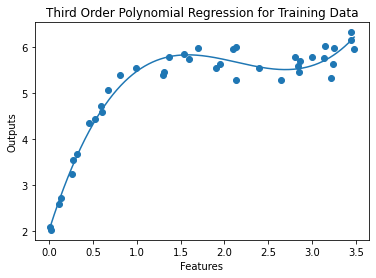

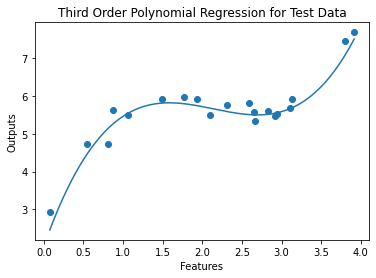

In [509]:
x_interval_training_order3 = np.linspace(min(x_training), max(x_training),999)

plt.figure()
plt.title("Third Order Polynomial Regression for Training Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.scatter(x_training, y_training)
plt.plot(x_interval_training_order3, order_poly(x_interval_training_order3, order_3_weight,3))


x_interval_testing_order3 = np.linspace(min(x_testing), max(x_testing),999)

plt.figure()
plt.title("Third Order Polynomial Regression for Test Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.scatter(x_testing, y_testing)
plt.plot(x_interval_testing_order3, order_poly(x_interval_testing_order3, order_3_weight,3))

Calculate Average Error

In [510]:
error_order_3_training = get_error(x_training_three, y_training, order_3_weight)
error_order_3_testing = get_error(x_testing_three, y_testing, order_3_weight)

print(f"Average error for training set is: {error_order_3_training}")
print(f"Average error for testing set is: {error_order_3_testing}")

Average error for training set is: 0.03922874661114212
Average error for testing set is: 0.05641833004416223


2. f) Implement the 3rd-order polynomial regression by adding new features x^2, x^3, x^4 to the inputs. Repeat (b) and (c). Compare the training error and test error. Compared with the previous results, which order is the best for fitting the data?

Add x^4 as a feature to numpy array containing the feature x^3 and x^2

In [511]:
x_training_four = np.c_[np.power(x_training,4), x_training_three]
x_testing_four = np.c_[np.power(x_testing,4), x_testing_three]

Calculate weight vector

In [512]:
order_4_weight = get_weight(x_training_four, y_training)
print(order_4_weight)

[-0.07096305  0.9640118  -4.10194886  6.79940213  1.89643657]


Plot training and test data


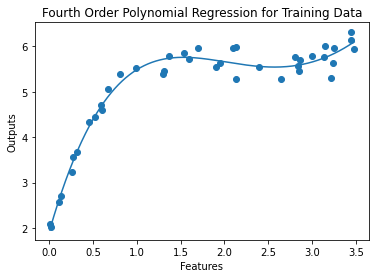

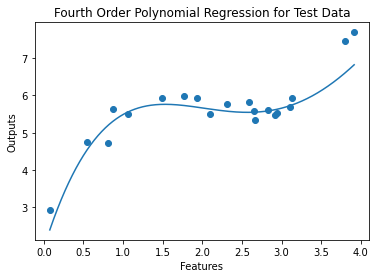

In [513]:
x_interval_training_order4 = np.linspace(min(x_training), max(x_training),999)

plt.figure()
plt.title("Fourth Order Polynomial Regression for Training Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.scatter(x_training, y_training)
plt.plot(x_interval_training_order4, order_poly(x_interval_training_order4, order_4_weight,4))


x_interval_testing_order4 = np.linspace(min(x_testing), max(x_testing),999)

plt.figure()
plt.title("Fourth Order Polynomial Regression for Test Data")
plt.xlabel("Features")
plt.ylabel("Outputs")
plt.scatter(x_testing, y_testing)
plt.plot(x_interval_testing_order4, order_poly(x_interval_testing_order4, order_4_weight,4))

Calculate Average Error

In [514]:
error_order_4_training = get_error(x_training_four, y_training, order_4_weight)
error_order_4_testing = get_error(x_testing_four, y_testing, order_4_weight)

print(f"Average error for training set is: {error_order_4_training}")
print(f"Average error for testing set is: {error_order_4_testing}")

Average error for training set is: 0.03564470724439951
Average error for testing set is: 0.12722197194709298
